In [2]:
import pandas as pd
df = pd.read_csv("EcommerceCustomerData.csv")
print(df)

   Order ID Customer ID  Gender Country Product Category  Purchase Amount  \
0      1001        C001    Male   India      Electronics            15000   
1      1002        C002  Female     USA         Clothing             2500   
2      1003        C003  Female      UK        Groceries              800   
3      1004        C004    Male   India      Electronics            12000   
4      1005        C005  Female  Canada         Clothing             4000   
5      1006        C006    Male     USA        Groceries             1000   

   Order Date Payment Method  
0  2024-12-01    Credit Card  
1  2024-12-02            UPI  
2  2024-12-03           Cash  
3  2024-12-04    Credit Card  
4  2024-12-05     Debit Card  
5  2024-12-06           Cash  


In [4]:
print("Shape",df.shape)

Shape (6, 8)


In [6]:
print("Columns",df.columns.tolist())
print(df.info())

Columns ['Order ID', 'Customer ID', 'Gender', 'Country', 'Product Category', 'Purchase Amount', 'Order Date', 'Payment Method']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          6 non-null      int64 
 1   Customer ID       6 non-null      object
 2   Gender            6 non-null      object
 3   Country           6 non-null      object
 4   Product Category  6 non-null      object
 5   Purchase Amount   6 non-null      int64 
 6   Order Date        6 non-null      object
 7   Payment Method    6 non-null      object
dtypes: int64(2), object(6)
memory usage: 516.0+ bytes
None


In [7]:
print(df.isnull())

   Order ID  Customer ID  Gender  Country  Product Category  Purchase Amount  \
0     False        False   False    False             False            False   
1     False        False   False    False             False            False   
2     False        False   False    False             False            False   
3     False        False   False    False             False            False   
4     False        False   False    False             False            False   
5     False        False   False    False             False            False   

   Order Date  Payment Method  
0       False           False  
1       False           False  
2       False           False  
3       False           False  
4       False           False  
5       False           False  


In [8]:
print(df.describe())

          Order ID  Purchase Amount
count     6.000000         6.000000
mean   1003.500000      5883.333333
std       1.870829      6086.186546
min    1001.000000       800.000000
25%    1002.250000      1375.000000
50%    1003.500000      3250.000000
75%    1004.750000     10000.000000
max    1006.000000     15000.000000


In [11]:
print(df["Country"].unique())
print(df["Product Category"].value_counts())

['India' 'USA' 'UK' 'Canada']
Product Category
Electronics    2
Clothing       2
Groceries      2
Name: count, dtype: int64


In [14]:
top_customers = df.groupby("Customer ID")["Purchase Amount"].sum().sort_values(ascending = False).head(5)
print("Total Spend by Top Customers:\n",top_customers)

Total Spend by Top Customers:
 Customer ID
C001    15000
C004    12000
C005     4000
C002     2500
C006     1000
Name: Purchase Amount, dtype: int64


In [16]:
#Total Sales by Product Category
category_sales = df.groupby("Product Category")["Purchase Amount"].sum().sort_values(ascending=False).head(5)
print("Total Sales by Product Category:\n",category_sales)

Total Sales by Product Category:
 Product Category
Electronics    27000
Clothing        6500
Groceries       1800
Name: Purchase Amount, dtype: int64


In [17]:
#Number of Orders By Country:
country_orders = df["Country"].value_counts()
print("The number of orders in country wise:\n",country_orders)

The number of orders in country vise:
 Country
India     2
USA       2
UK        1
Canada    1
Name: count, dtype: int64


In [19]:
#Gender-wise Purchase count
gender_count = df["Gender"].value_counts()
print("The Gender-wise Purchase Count:\n",gender_count)

The Gender-wise Purchase Count:
 Gender
Male      3
Female    3
Name: count, dtype: int64


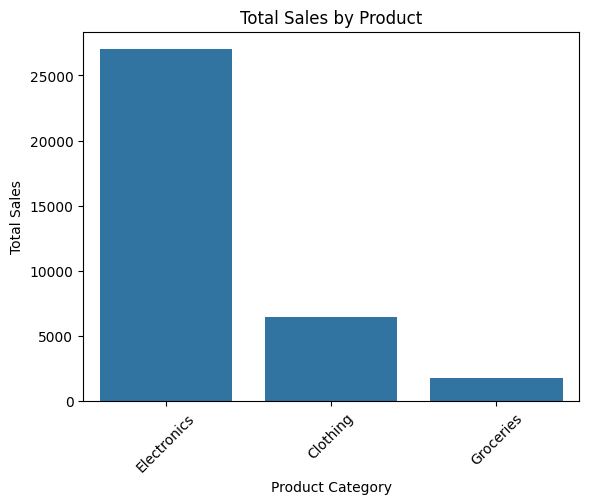

In [30]:
##-------------DATA VISUALIZATION------------
import matplotlib.pyplot as plt
import seaborn as sns
#Total Sales by Product Category
sns.barplot(category_sales)
plt.title("Total Sales by Product")
plt.ylabel("Total Sales")
plt.xticks(rotation = 45)
#plt.tight_layout()
plt.show()

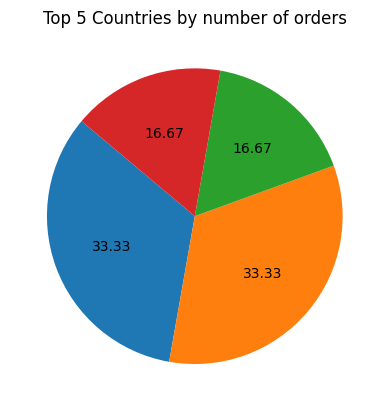

In [39]:
#Number of Orders By Country:
country_orders = df["Country"].value_counts().head(5)
plt.pie(country_orders,autopct = "%0.2f", startangle=140)
plt.title("Top 5 Countries by number of orders")
plt.show()

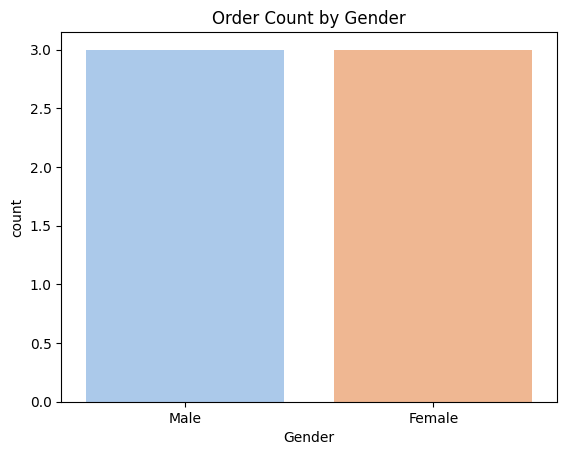

In [48]:
#Count-plot Gender Distribution
sns.countplot(x = "Gender",hue = "Gender",data = df,palette="pastel",legend = False)
plt.title("Order Count by Gender")
plt.show()

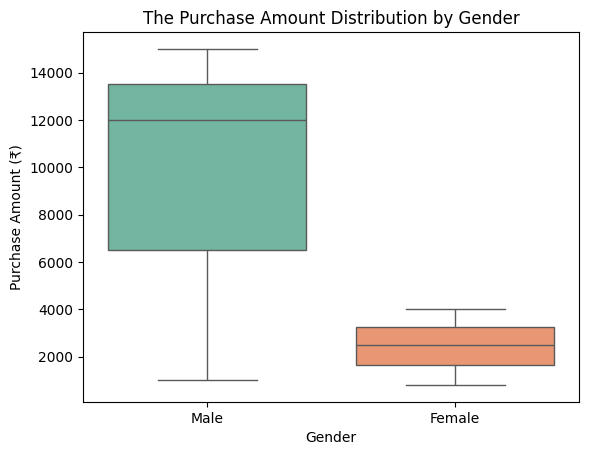

In [51]:
#Purchase Amount by Gender(Box Plot)
sns.boxplot(data = df,x = "Gender", hue = "Gender",y = "Purchase Amount",palette = "Set2",legend = False)
plt.title("The Purchase Amount Distribution by Gender")
plt.ylabel("Purchase Amount (₹)")
plt.show()

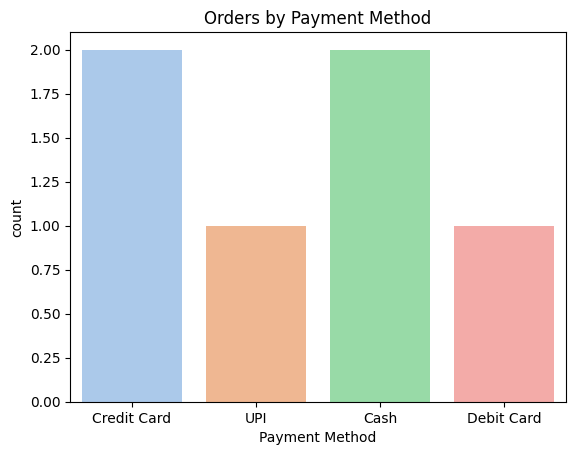

In [53]:
#Payment Method Usage-Count plot
sns.countplot(data=df, x = "Payment Method",hue = "Payment Method", palette = "pastel",legend = False)
plt.title("Orders by Payment Method")
plt.show()